In [38]:
import numpy as np 
from edes.modules.detection.detection_utils import parallel, plot, plot_ax, big_plt_font, dBm_to_W, W_to_dBm
import matplotlib.pyplot as plt
from scipy.constants import k
big_plt_font()

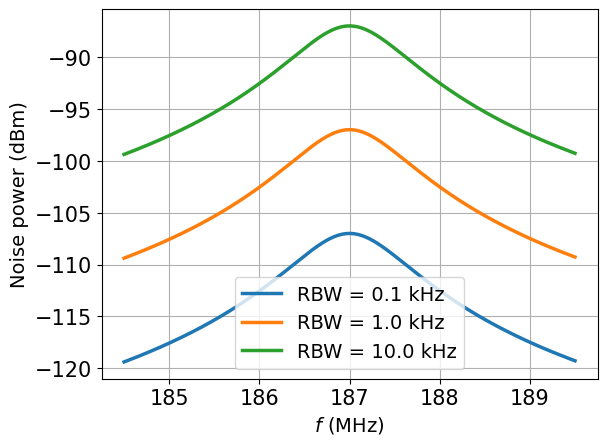

In [56]:
f = 187e6 
omega = 2*np.pi*f 
C = 4e-12 
L = 1/omega**2/C
Q = 150 
R = Q*np.sqrt(L/C)
#R = 50
# np.sqrt(L/C)*500*1e-12, L*1e9
Z_LC = lambda f: parallel(1j*2*np.pi*f*L, 1/(1j*2*np.pi*f*C))
Z_ratio = lambda f: abs(Z_LC(f) / (R + Z_LC(f)))**2
T = 300
RBW = 100
G = 46.78
S11 = 10**(-20/10)

f = np.linspace(187-2.5, 187+2.5, 10000)*1e6


fig, ax = plt.subplots()
for rbw in [100, 1000, 10000]:
    Pnoise = W_to_dBm(k*T * Z_ratio(f) * rbw) + G - 10*np.log10(1-S11)
    plot_ax(ax, f/1e6, Pnoise, label=f'RBW = {rbw/1000} kHz', xlabel=r'$f$ (MHz)', ylabel=r'Noise power (dBm)')
# ax.set_xscale('log')
ax.legend()
plt.show()

In [41]:
W_to_dBm(k*300)

np.float64(-173.82795462602104)

In [2]:
f = 187e6 
omega = 2*np.pi*f 
C = 2e-12 
L = 1/omega**2/C
np.sqrt(L/C)*150, L*1e9

(63832.19642723075, 362.1821600644062)

In [24]:
f = 1.45e9 
omega = 2*np.pi*f 
C = 1e-12 
L = 1/omega**2/C
L*1e9

12.047703167935525

In [61]:
S = lambda mag, ang: mag*np.exp(1j*ang/180*np.pi)

In [62]:
Z0 = 50 
omega = 2*np.pi*1e9
S11 = S(0.988, -20) #S(0.96, 29)#
S21 = S(5.327, 160.1) 
S12 = S(0.015, 75.7) 
S22 = S(0.574, -16.3)
# Z11 = Z0 * ((1 + S11) * (1 - S22) + S12 * S21) / ((1 - S11) * (1 - S22) - S12 * S21) 
Zin = Z0 * (1+S11)/(1-S11) 
Zin = Z11
Yin = 1/Zin 
G = Yin.real 
B = Yin.imag 
Rp = 1/G 
Cp = B/omega
Rp, Cp

(np.float64(411.26330820899943), np.float64(7.684211236871623e-13))

In [65]:
Zin, Rp, Cp

(np.complex128(83.2055134872784-165.21566894010073j),
 np.float64(411.26330820899943),
 np.float64(7.684211236871623e-13))

In [64]:
Z0 * (1+S11)/(1-S11) 

np.complex128(9.997369796016384-283.22185012634947j)

In [60]:
np.angle(S11)*180/np.pi

np.float64(19.999999999999996)

In [8]:
Y = 1/(40+10j)
w = 2*np.pi*100e6
1/Y.real, -1/Y.imag/w*1e9

(42.5, 270.5634032562221)

In [10]:
1/w**2/1e-12

2.533029591058445e-06

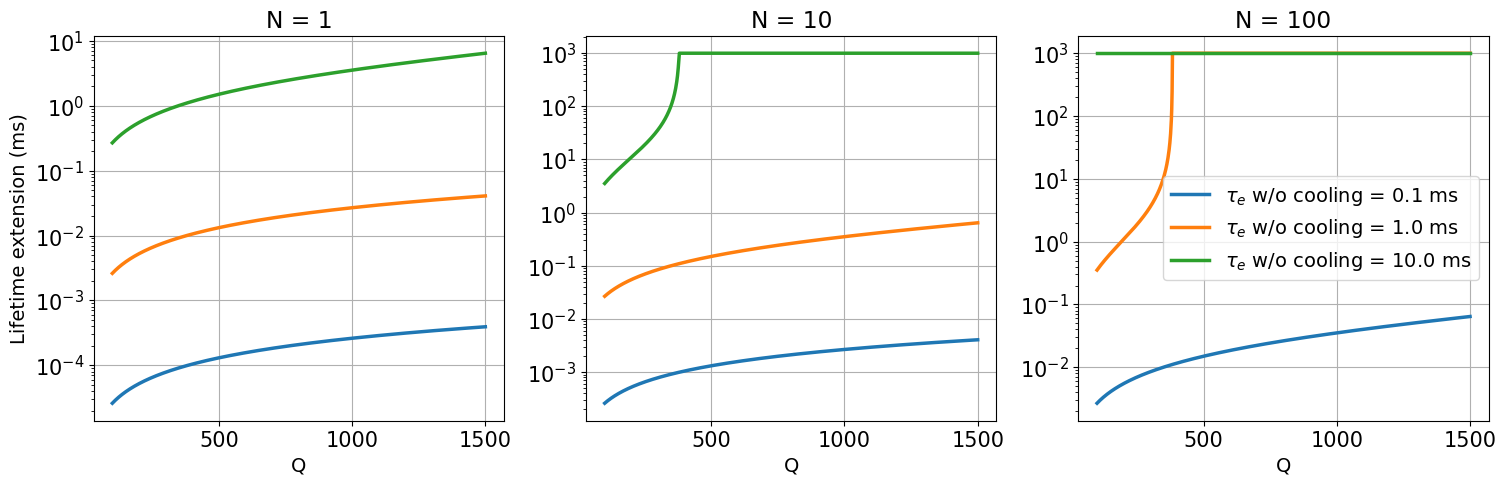

In [40]:
from scipy.constants import e, m_e
from edes.modules.detection.detection_utils import plot_ax, big_plt_font
import matplotlib.pyplot as plt
big_plt_font()

w = 220e6 * 2*np.pi
C = 5e-12
L = 1/w**2/C
R = lambda Q: Q*np.sqrt(L/C)

lifetime = [0.1e-3, 1e-3, 10e-3]
cooling_rate = lambda Q, N: N*e**2*R(Q)/m_e/(12.5e-3)**2  # in rad/s
lifetime_final = lambda tau_e, Q, N: np.array([1 if 1/tau_e < cooling_rate(q, N) else min(1 / (1/tau_e - cooling_rate(q, N)), 1) for q in Q])
Q = np.linspace(100, 1500, 1000) 

fig, ax = plt.subplots(ncols=3, figsize=(18, 5))
N = [1, 10, 100] 
for i in range(3): 
    for l in lifetime: 
        plot_ax(ax[i], Q, (lifetime_final(l, Q, N[i])-l)*1e3, label=f'$\\tau_e$ w/o cooling = {l*1e3} ms', title=f'N = {N[i]}', xlabel='Q')
    
    ax[i].set_yscale('log')
ax[-1].legend() 
ax[0].set_ylabel('Lifetime extension (ms)')
plt.show()

In [42]:
10*np.log(3)

np.float64(10.986122886681098)